# Final Project: Does a Higher Population Lead to Higher Emissions

## Variables
- GDP - Countries GDP at purchasing power parities, measured (Billion 2015\\$ PPP)
- Population - Population of specific Country, measured (Mperson)
- CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)
- Energyintensityby_GDP- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015\\$ GDP PPP)
- Energyintensityper_capita - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
- Energy_consumption - Amount of Consumption for the specific energy source, measured (quad Btu)
- Energy_production - Amount of Production for the specific energy source, measured (quad Btu)

In [298]:
import pandas as pd
import scipy
from matplotlib import pyplot  as plt
import numpy as np
import empiricaldist as ed
import math

In [272]:
# places emissions into data frameji
emissions_df = pandas.read_csv(r"energy.csv" )

# Things I Want to Do to This Data
1. Create new data frames with only highest emitting 
2. Sort by population
3. Sort by GDP
4. Sort by per capita
5. See impact of renewables in countries that use them

In [273]:
emissions_df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


## Histograms

In [274]:
# filter out total world stats
countries_em = emissions_df[~(emissions_df["Country"] == "World")]
# choose Year 2020 & each country only once
emissions20 = countries_em[(countries_em["Year"]==2019) & (countries_em["Energy_type"]=="all_energy_types")]
emissions20 = pd.DataFrame.reset_index(emissions20)
emissions20

,index,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,54060,54060,Afghanistan,all_energy_types,2019,0.122748,0.055210,79.4546,38050.900,3.225901,1.544888,9.391163
1,54066,54066,Albania,all_energy_types,2019,0.110748,0.089082,38.2684,2879.920,38.455319,2.893987,4.031302
2,54072,54072,Algeria,all_energy_types,2019,2.643503,6.429790,509.0660,43030.400,61.433374,5.192849,145.987969
3,54078,54078,American Samoa,all_energy_types,2019,0.004912,0.000000,NaN,55.312,88.796444,0.000000,0.355428
4,54084,54084,Angola,all_energy_types,2019,0.372428,3.510208,193.8260,31849.800,11.693253,1.921454,17.644577
...,...,...,...,...,...,...,...,...,...,...,...,...
225,55410,55410,Wake Island,all_energy_types,2019,0.019436,0.000000,NaN,NaN,0.000000,0.000000,1.273787
226,55416,55416,Western Sahara,all_energy_types,2019,0.003712,0.000000,NaN,NaN,0.000000,0.000000,0.263038
227,55422,55422,Yemen,all_energy_types,2019,0.159020,0.133273,53.0838,29162.200,5.452938,2.995635,8.292505
228,55428,55428,Zambia,all_energy_types,2019,0.207097,0.148004,247.1819,17873.850,11.586567,0.837831,7.096290


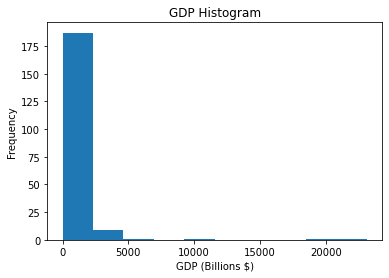

In [275]:
# histogram of GDP
gdp = emissions20["GDP"][~np.isnan(emissions20["GDP"])]
plt.hist(gdp)
plt.title("GDP Histogram")
plt.xlabel("GDP (Billions $)")
plt.ylabel("Frequency")
plt.show()

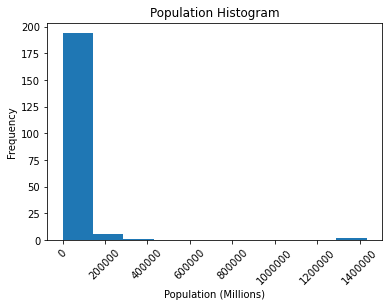

In [276]:
# Population histogram
pop = emissions20["Population"][~np.isnan(emissions20["Population"])]
plt.hist(pop)
plt.title("Population Histogram")
plt.xlabel("Population (Millions)")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()

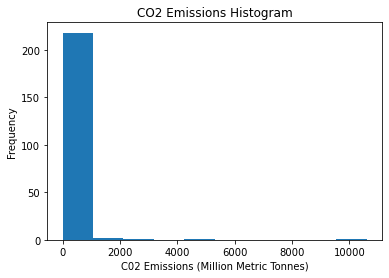

In [277]:
# emissions histogram
co2 = emissions20["CO2_emission"][~np.isnan(emissions20["CO2_emission"])]
plt.hist(co2, bins = 10)
plt.title("CO2 Emissions Histogram")
plt.xlabel("C02 Emissions (Million Metric Tonnes)")
plt.ylabel("Frequency")
plt.show()

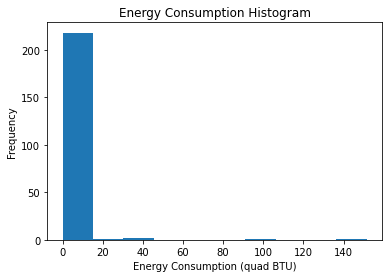

In [278]:
# energy consumption histogram
energy_cons = emissions20["Energy_consumption"][~np.isnan(emissions20["Energy_consumption"])]
plt.hist(energy_cons, bins = 10)
plt.title("Energy Consumption Histogram")
plt.xlabel("Energy Consumption (quad BTU)")
plt.ylabel("Frequency")
plt.show()

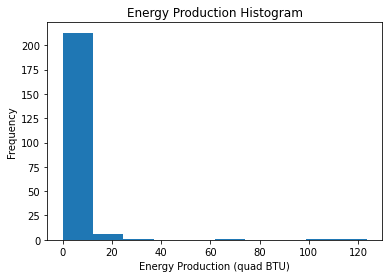

In [279]:
# energy production histogram
energy_prod = emissions20["Energy_production"][~np.isnan(emissions20["Energy_production"])]
plt.hist(energy_prod, bins = 10)
plt.title("Energy Production Histogram")
plt.xlabel("Energy Production (quad BTU)")
plt.ylabel("Frequency")
plt.show()

There are huge inequalities between countries when it comes to population, GDP, energy consumptions, and co2 emissions. None are normally distributed. 

## Other Descriptive Characteristics

In [280]:
# mean, spread, tails of GDP
print(f"GDP\nMean: {gdp.mean()}\nSpread: {gdp.var()}\nTails:\n{pd.Series.head(gdp)}{pd.Series.tail(gdp)}")

GDP
Mean: 638.4512352949998
Spread: 5468357.318554283
Tails:
0     79.45460
1     38.26840
2    509.06600
4    193.82600
6      2.12893
Name: GDP, dtype: float64223    190.1472
224    915.5040
227     53.0838
228    247.1819
229     37.6204
Name: GDP, dtype: float64


In [281]:
# mean, spread, tails of Population
print(f"Population\nMean: {pop.mean()}\nSpread: {pop.var()}\nTails:\n{pd.Series.head(pop)}{pd.Series.tail(pop)}")

Population
Mean: 38003.108688817716
Spread: 20696274720.739307
Tails:
0    38050.900
1     2879.920
2    43030.400
3       55.312
4    31849.800
Name: Population, dtype: float64223    28515.85
224    96425.90
227    29162.20
228    17873.85
229    14654.20
Name: Population, dtype: float64


In [282]:
# mean, spread, tails of Co2
print(f"CO2 Emissions\nMean: {co2.mean()}\nSpread: {co2.var()}\nTails:\n{pd.Series.head(co2)}{pd.Series.tail(co2)}")

CO2 Emissions
Mean: 159.57369281477574
Spread: 673858.0891964487
Tails:
0      9.391163
1      4.031302
2    145.987969
3      0.355428
4     17.644577
Name: CO2_emission, dtype: float64225    1.273787
226    0.263038
227    8.292505
228    7.096290
229    8.964759
Name: CO2_emission, dtype: float64


In [283]:
# mean, spread, tails of energy consumption
print(f"Energy Consumption\nMean: {energy_cons.mean()}\nSpread: {energy_cons.var()}\nTails:\n{pd.Series.head(energy_cons)}{pd.Series.tail(energy_cons)}")

Energy Consumption
Mean: 2.6952488338739244
Spread: 160.75077129753026
Tails:
0    0.122748
1    0.110748
2    2.643503
3    0.004912
4    0.372428
Name: Energy_consumption, dtype: float64225    0.019436
226    0.003712
227    0.159020
228    0.207097
229    0.168651
Name: Energy_consumption, dtype: float64


In [284]:
# mean, spread, tails of energy production
print(f"Energy Production\nMean: {energy_prod.mean()}\nSpread: {energy_prod.var()}\nTails:\n{pd.Series.head(energy_prod)}{pd.Series.tail(energy_prod)}")

Energy Production
Mean: 2.7421926845185047
Spread: 142.73142468667712
Tails:
0    0.055210
1    0.089082
2    6.429790
3    0.000000
4    3.510208
Name: Energy_production, dtype: float64225    0.000000
226    0.000000
227    0.133273
228    0.148004
229    0.143462
Name: Energy_production, dtype: float64


## PMF's

In [326]:
co2

0        9.391163
1        4.031302
2      145.987969
3        0.355428
4       17.644577
          ...    
225      1.273787
226      0.263038
227      8.292505
228      7.096290
229      8.964759
Name: CO2_emission, Length: 223, dtype: float64

In [331]:
for index, val in co2.items():
    print(val)

9.391163087
4.031301559
145.987969135
0.35542766
17.644576606
0.013782287
0.7348894
191.358658271
5.976457104
1.20493081
410.865148205
63.844027897
33.285637886
39.014442502
90.78163083
1.702104465
56.523597698
132.279624636
0.577712955
7.736424191
0.797279806
0.967306365
18.335565837
17.266938088
6.188921367
453.443272227
0.216635316
10.22519768
41.542759685
4.391342618
32.968880216
0.67983302
1.001529634
11.890895952
7.245713401
613.089866972
0.667298
0.278282
1.7162899
86.874650457
10608.600386434
75.94596771
0.301926504
4.4339781
2.641757936
0.1123327
7.923880021
17.147887659
22.496372604
8.226035335
104.272224724
10.798183713
36.120050677
0.67469826
0.185983702
25.265246857
37.349371309
235.494498177
7.04650887
4.669231827
0.74245581
5.509905901
1.203506529
14.060422857
0.04640807
0.869814783
1.649180054
44.65256288
341.980653833
0.870318457
1.029653081
3.278674777
0.5941987
9.84778636
781.596225481
17.630249841
13.83733
73.672821577
0.612110253
0.317136381
1.90047837
1.82829707
1

In [334]:
temp = []
for index, val in co2.items():
    if(val > 10000):
        temp.append(11000)
    elif(val > 9000):
        temp.append(10000)
    elif(val > 8000):
        temp.append(9000)
    elif(val > 7000):
        temp.append(8000)
    elif(val > 6000):
        temp.append(7000)
    elif(val > 5000):
        temp.append(6000)
    elif(val > 4000):
        temp.append(5000)
    elif(val > 3000):
        temp.append(4000)
    elif(val > 2000):
        temp.append(3000)
    elif(val> 1000):
        temp.append(2000)
    else:
        temp.append(1000)
groups = pd.Series(temp)

In [337]:
groups.mean()

1085.201793721973

In [287]:
# comparing co2 emissions of most populous countries vs all others
pop_sorted = emissions20.sort_values(by=["Population"], ascending=False).reset_index(drop=True)
pop_sorted
pop_high = pop_sorted[0:10]
pop_other = pop_sorted.drop(pop_sorted.index[0:10]).reset_index(drop=True)

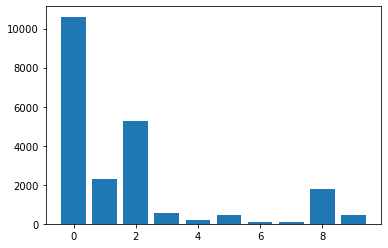

In [288]:
pop_high_em = pop_high["CO2_emission"]
high_pmf = ed.Pmf(pop_high_em)
high_pmf.bar()

,probs
0,1140.949688
1,14.060423
2,135.216312
3,235.494498
4,241.806422
...,...
215,0.000000
216,0.301546
217,0.000000
218,1.273787


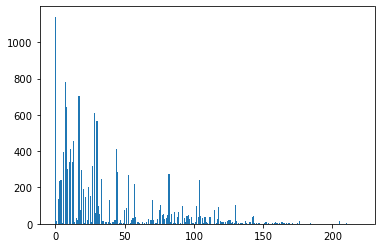

In [289]:
pop_other_em = pop_other["CO2_emission"]
low_pmf = ed.Pmf(pop_other_em)
low_pmf.bar()
low_pmf

In [290]:

d6 = ed.Pmf.from_seq([1,2,3,4,5,6])
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


# For Tomorrow
- fix tails (need to sort it ascending then do head/tails call
- pmf should be probability of having C02 emissions > mean

## CDF

In [291]:
co2_cdf = ed.Cdf(emissions20.CO2_emission)
co2_cdf

,probs
0,9.391163
1,4.031302
2,145.987969
3,0.355428
4,17.644577
...,...
225,1.273787
226,0.263038
227,8.292505
228,7.096290


0.9999999999999999


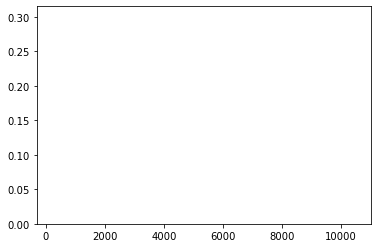

In [292]:
num_bins = 50
counts, bins = np.histogram(pop_high_em, bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print (probs.sum()) # 1.0
plt.bar(bins, probs, 1.0/num_bins)
plt.show()